In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/pyms-diabete/diabete.csv


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Importer des données

In [3]:
diabete = pd.read_csv("../input/pyms-diabete/diabete.csv")

In [4]:
diabete.head().T

,0,1,2,3,4
n_pregnant,6.000,1.000,8.000,1.000,0.000
glucose,148.000,85.000,183.000,89.000,137.000
tension,72.000,66.000,64.000,66.000,40.000
thickness,35.000,29.000,0.000,23.000,35.000
insulin,0.000,0.000,0.000,94.000,168.000
bmi,33.600,26.600,23.300,28.100,43.100
pedigree,0.627,0.351,0.672,0.167,2.288
age,50.000,31.000,32.000,21.000,33.000
diabete,1.000,0.000,1.000,0.000,1.000


In [5]:
diabete.describe()

,n_pregnant,glucose,tension,thickness,insulin,bmi,pedigree,age,diabete
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


counter les nombres de diabete

In [6]:
diabete.diabete.value_counts()

0    500
1    268
Name: diabete, dtype: int64

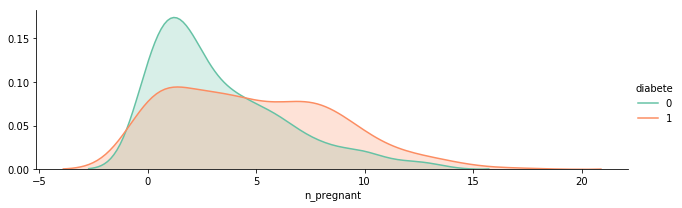

In [7]:
fig = sns.FacetGrid(diabete, hue="diabete", aspect=3, palette="Set2") # aspect=3 permet d'allonger le graphique
fig.map(sns.kdeplot, "n_pregnant", shade=True)
fig.add_legend()

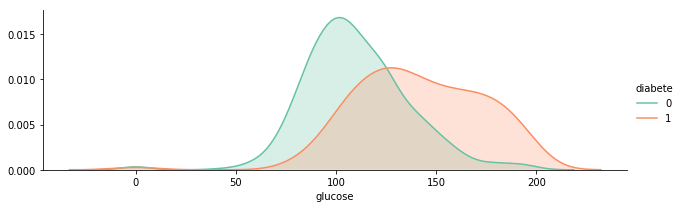

In [8]:
fig = sns.FacetGrid(diabete, hue="diabete", aspect=3, palette="Set2") # aspect=3 permet d'allonger le graphique
fig.map(sns.kdeplot, "glucose", shade=True)
fig.add_legend()

<Figure size 1440x1440 with 0 Axes>

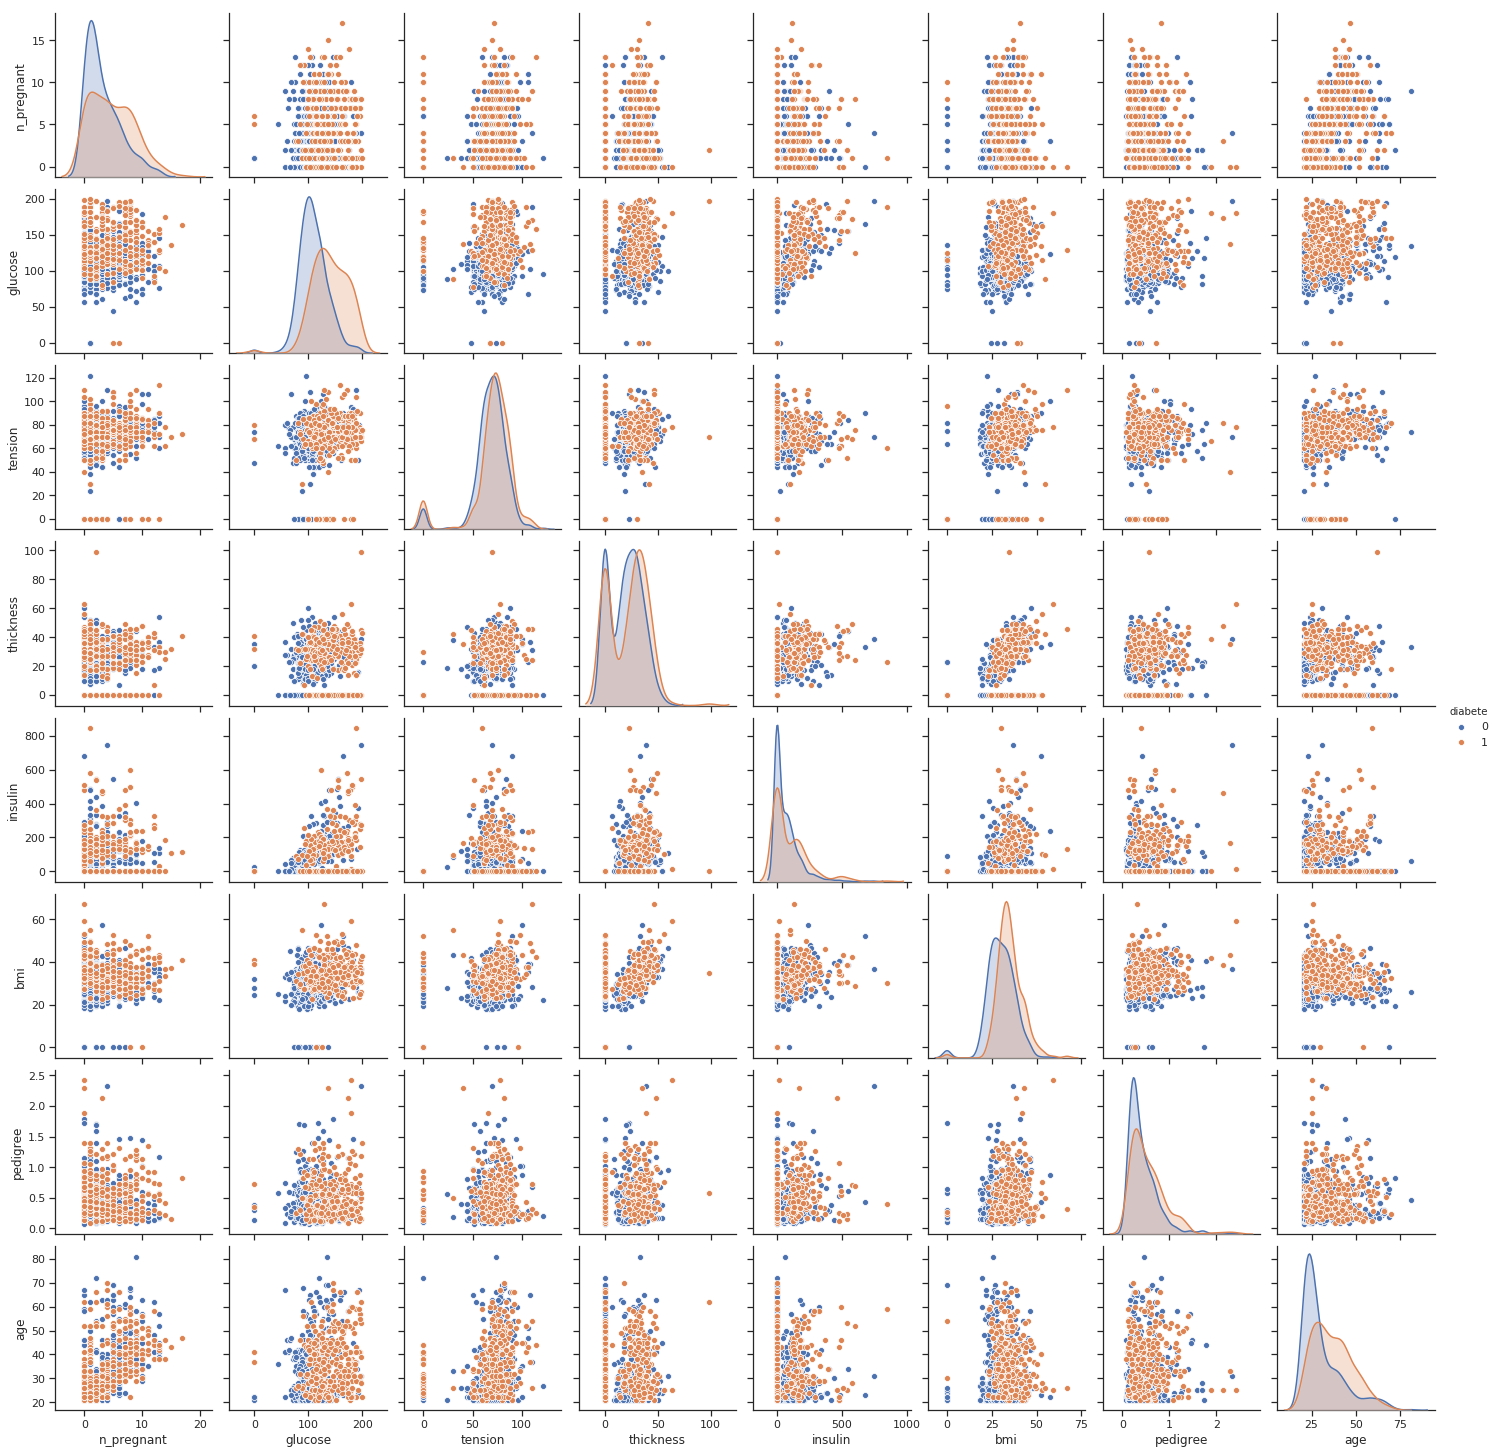

In [9]:
sns.set(style='ticks')
plt.figure(figsize=(20,20))
sns.pairplot(diabete, hue='diabete')

## Trouver des données inutiles

Avec des graphiques ci-dessus, on voie qu'il existe des données qui sont équales à 0, il sont pas possibles pour les caractéristiques physiques (Insulin = 0 c'est possible)

Tension: 

In [10]:
print(diabete[diabete.tension == 0].shape[0])
print(diabete[diabete.tension == 0].index.tolist()) # tension n'est pas possible d'être equal à0
print(diabete[diabete.tension == 0].groupby('diabete')['age'].count())

35
[7, 15, 49, 60, 78, 81, 172, 193, 222, 261, 266, 269, 300, 332, 336, 347, 357, 426, 430, 435, 453, 468, 484, 494, 522, 533, 535, 589, 601, 604, 619, 643, 697, 703, 706]
diabete
0    19
1    16
Name: age, dtype: int64


Glucose:

In [11]:
print(diabete[diabete.glucose == 0].shape[0])
print(diabete[diabete.glucose == 0].index.tolist()) # Glucose n'est pas possible d'être equal à0
print(diabete[diabete.glucose == 0].groupby('diabete')['age'].count())

5
[75, 182, 342, 349, 502]
diabete
0    3
1    2
Name: age, dtype: int64


thickness

In [12]:
print(diabete[diabete.thickness == 0].shape[0])
print(diabete[diabete.thickness == 0].index.tolist())
print(diabete[diabete.thickness == 0].groupby('diabete')['age'].count())

227
[2, 5, 7, 9, 10, 11, 12, 15, 17, 21, 22, 26, 29, 33, 36, 41, 44, 46, 49, 58, 60, 61, 62, 64, 67, 72, 76, 78, 81, 84, 90, 93, 100, 101, 102, 104, 106, 113, 115, 116, 117, 123, 124, 129, 131, 138, 140, 143, 148, 151, 154, 164, 167, 168, 170, 176, 178, 179, 180, 183, 184, 190, 192, 193, 196, 201, 207, 219, 221, 222, 226, 230, 233, 235, 239, 242, 246, 250, 251, 261, 264, 266, 268, 269, 272, 274, 278, 280, 283, 284, 294, 299, 300, 303, 304, 317, 319, 327, 332, 333, 336, 337, 339, 343, 344, 347, 350, 351, 354, 355, 361, 363, 366, 378, 391, 394, 398, 400, 401, 404, 406, 407, 408, 418, 426, 430, 433, 435, 437, 439, 443, 451, 453, 456, 461, 464, 468, 473, 474, 484, 489, 494, 495, 496, 505, 509, 512, 513, 517, 518, 522, 523, 524, 529, 531, 533, 535, 536, 537, 552, 557, 559, 560, 564, 570, 571, 577, 578, 583, 586, 587, 589, 592, 596, 598, 601, 604, 615, 616, 619, 622, 624, 626, 627, 628, 630, 632, 634, 635, 636, 641, 642, 643, 653, 658, 660, 674, 675, 676, 677, 678, 683, 684, 686, 690, 691, 6

Pour thickness, il y a trop des données qui sont équales à 0

BMI

In [13]:
print(diabete[diabete.bmi == 0].shape[0])
print(diabete[diabete.bmi == 0].index.tolist())
print(diabete[diabete.bmi == 0].groupby('diabete')['age'].count())

11
[9, 49, 60, 81, 145, 371, 426, 494, 522, 684, 706]
diabete
0    9
1    2
Name: age, dtype: int64


On peut supprimer des données inutiles:

In [14]:
data = diabete[(diabete.tension != 0) & (diabete.bmi != 0) & (diabete.glucose!= 0)]

## Visualisations

1. n_pregnant

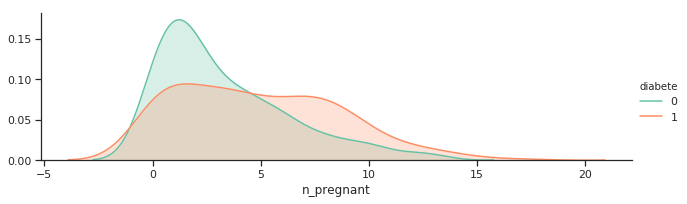

In [15]:
fig = sns.FacetGrid(data, hue="diabete", aspect=3, palette="Set2") # aspect=3 permet d'allonger le graphique
fig.map(sns.kdeplot, "n_pregnant", shade=True)
fig.add_legend()

Les 2 courbes sont confondues

2. Tension

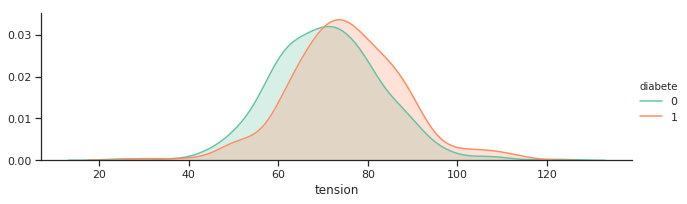

In [16]:
fig = sns.FacetGrid(data, hue="diabete", aspect=3, palette="Set2") # aspect=3 permet d'allonger le graphique
fig.map(sns.kdeplot, "tension", shade=True)
fig.add_legend()

3. Glucose

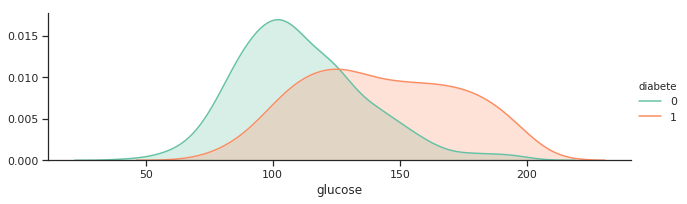

In [17]:
fig = sns.FacetGrid(data, hue="diabete", aspect=3, palette="Set2") # aspect=3 permet d'allonger le graphique
fig.map(sns.kdeplot, "glucose", shade=True)
fig.add_legend()

4. Thickness

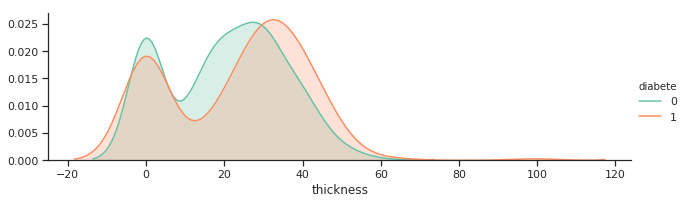

In [18]:
fig = sns.FacetGrid(data, hue="diabete", aspect=3, palette="Set2") # aspect=3 permet d'allonger le graphique
fig.map(sns.kdeplot, "thickness", shade=True)
fig.add_legend()

5. bmi

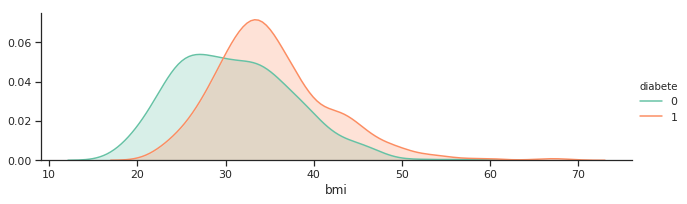

In [19]:
fig = sns.FacetGrid(data, hue="diabete", aspect=3, palette="Set2") # aspect=3 permet d'allonger le graphique
fig.map(sns.kdeplot, "bmi", shade=True)
fig.add_legend()

6. Insulin

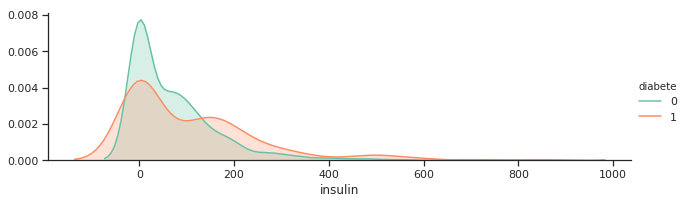

In [20]:
fig = sns.FacetGrid(data, hue="diabete", aspect=3, palette="Set2") # aspect=3 permet d'allonger le graphique
fig.map(sns.kdeplot, "insulin", shade=True)
fig.add_legend()

## Comme indiqué par les graphiques ci-dessus, on peut voir que le glucose est corrélé avec le diabète

## Mechine Learning

Séparer des donnée par le set train et le set test

In [21]:
X = data.drop(['diabete'], axis=1) # sauf cible
y = data.diabete

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [23]:
print(X_train.shape)
print(X_test.shape)

(579, 8)
(145, 8)


## Régression logistique

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

In [25]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y_lr = lr.predict(X_test)

In [27]:
print(confusion_matrix(y_test,y_lr))

[[79 11]
 [29 26]]


In [28]:
print(accuracy_score(y_test,y_lr))

0.7241379310344828


In [29]:
print(classification_report(y_test, y_lr))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        90
           1       0.70      0.47      0.57        55

    accuracy                           0.72       145
   macro avg       0.72      0.68      0.68       145
weighted avg       0.72      0.72      0.71       145



In [30]:
probas = lr.predict_proba(X_test)

In [31]:
print(probas)

[[0.92734417 0.07265583]
 [0.69798684 0.30201316]
 [0.96716984 0.03283016]
 [0.95016279 0.04983721]
 [0.87368421 0.12631579]
 [0.22889831 0.77110169]
 [0.75257725 0.24742275]
 [0.53367075 0.46632925]
 [0.60946723 0.39053277]
 [0.89876998 0.10123002]
 [0.87915864 0.12084136]
 [0.25477145 0.74522855]
 [0.89318285 0.10681715]
 [0.75302393 0.24697607]
 [0.91982473 0.08017527]
 [0.90379399 0.09620601]
 [0.86668426 0.13331574]
 [0.20610758 0.79389242]
 [0.61702392 0.38297608]
 [0.65314539 0.34685461]
 [0.95709654 0.04290346]
 [0.89861316 0.10138684]
 [0.48773313 0.51226687]
 [0.30685708 0.69314292]
 [0.7423389  0.2576611 ]
 [0.97452924 0.02547076]
 [0.80570975 0.19429025]
 [0.92800397 0.07199603]
 [0.90882812 0.09117188]
 [0.92739894 0.07260106]
 [0.42089339 0.57910661]
 [0.34510234 0.65489766]
 [0.06323959 0.93676041]
 [0.83918984 0.16081016]
 [0.95147435 0.04852565]
 [0.86408024 0.13591976]
 [0.42094727 0.57905273]
 [0.71854763 0.28145237]
 [0.96783435 0.03216565]
 [0.87273832 0.12726168]


Pour faciliter la visualisation

In [32]:
dfprobas = pd.DataFrame(probas,columns=['proba_0','proba_1'])
dfprobas['y'] = np.array(y_test)

In [33]:
dfprobas

,proba_0,proba_1,y
0,0.927344,0.072656,0
1,0.697987,0.302013,0
2,0.967170,0.032830,0
3,0.950163,0.049837,1
4,0.873684,0.126316,0
...,...,...,...
140,0.836284,0.163716,0
141,0.647352,0.352648,1
142,0.409194,0.590806,1
143,0.803075,0.196925,0


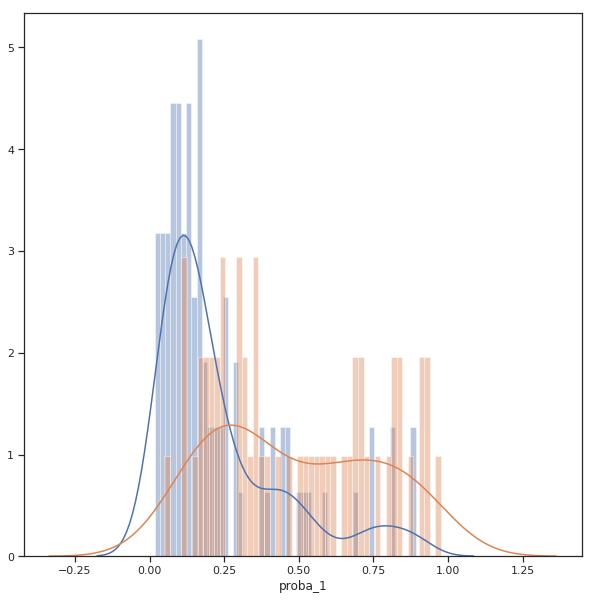

In [34]:
plt.figure(figsize=(10,10))
sns.distplot(1-dfprobas.proba_0[dfprobas.y==0], bins=50)
sns.distplot(dfprobas.proba_1[dfprobas.y==1], bins=50)

La distribution a une partie de confusion

## Forêt aléatoire

In [35]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

In [36]:
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.74      0.86      0.79        90
           1       0.68      0.51      0.58        55

    accuracy                           0.72       145
   macro avg       0.71      0.68      0.69       145
weighted avg       0.72      0.72      0.71       145



In [37]:
cm = confusion_matrix(y_test, y_rf)
print(cm)

[[77 13]
 [27 28]]


In [38]:
rf1 = ensemble.RandomForestClassifier(n_estimators=10, min_samples_leaf=10, max_features=3)
rf1.fit(X_train, y_train)
y_rf1 = rf.predict(X_test)
print(classification_report(y_test, y_rf1))

              precision    recall  f1-score   support

           0       0.74      0.86      0.79        90
           1       0.68      0.51      0.58        55

    accuracy                           0.72       145
   macro avg       0.71      0.68      0.69       145
weighted avg       0.72      0.72      0.71       145



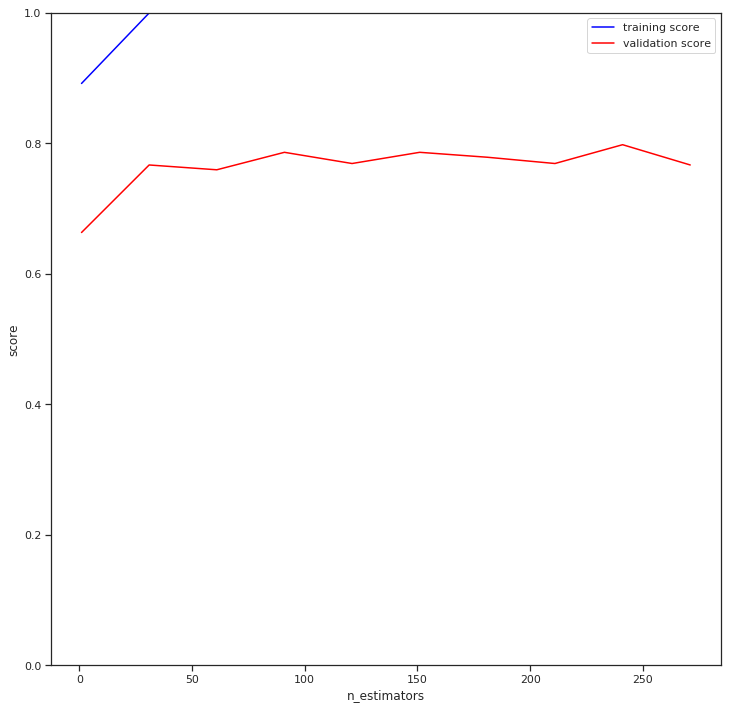

In [39]:
from sklearn.model_selection import validation_curve
params = np.arange(1, 300,step=30)
train_score, val_score = validation_curve(rf, X, y, 'n_estimators', params, cv=7)
plt.figure(figsize=(12,12))
plt.plot(params, np.median(train_score, 1), color='blue', label='training score')
plt.plot(params, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('n_estimators')
plt.ylabel('score');

In [40]:
from sklearn import model_selection

In [41]:
param_grid = {
              'n_estimators': [10, 100, 500],
              'min_samples_leaf': [1, 20, 50]
             }
estimator = ensemble.RandomForestClassifier()
rf_gs = model_selection.GridSearchCV(estimator, param_grid)

In [42]:
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [43]:
print(rf_gs.best_params_)

{'min_samples_leaf': 1, 'n_estimators': 500}


On sélectionne le meilleur estimateur

In [44]:
rf2 = rf_gs.best_estimator_

In [45]:
y_rf2 = rf2.predict(X_test)

In [46]:
print(classification_report(y_test, y_rf2))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80        90
           1       0.71      0.53      0.60        55

    accuracy                           0.74       145
   macro avg       0.73      0.70      0.70       145
weighted avg       0.73      0.74      0.73       145



Importance des cartactéristiques

In [47]:
importances = rf2.feature_importances_
indices = np.argsort(importances)

Text(0.5, 1.0, 'Importance des caracteristiques')

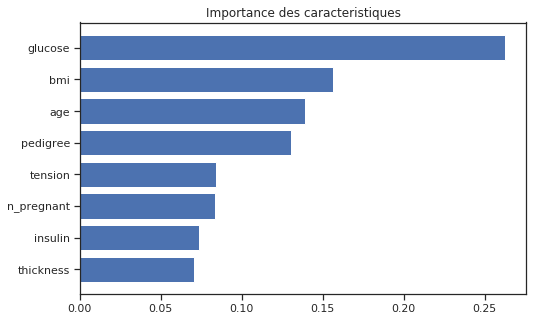

In [48]:
plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), X_train.columns[indices])
plt.title('Importance des caracteristiques')

## On voie clairement que comme prévu le glucose est corrélé avec le diabète

## Xgboost

In [49]:
import xgboost as XGB
xgb  = XGB.XGBClassifier()
xgb.fit(X_train, y_train)
y_xgb = xgb.predict(X_test)
cm = confusion_matrix(y_test, y_xgb)
print(cm)
print(classification_report(y_test, y_xgb))

[[75 15]
 [27 28]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        90
           1       0.65      0.51      0.57        55

    accuracy                           0.71       145
   macro avg       0.69      0.67      0.68       145
weighted avg       0.70      0.71      0.70       145



## Les méthodes de classification

1. Linear SVC

In [50]:
from sklearn.svm import SVC, LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
print(accuracy_score(y_test,Y_pred))

0.4


/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


2. SGD Classifier

In [51]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
print(accuracy_score(y_test,Y_pred))

0.7103448275862069


In [52]:
from sklearn.kernel_approximation import RBFSampler

rbf = RBFSampler(random_state=1)
X_features=rbf.fit_transform(X_test)
# clf = SGDClassifier()
sgd.fit(X_features,y_test)
print(sgd.score(X_features,y_test))

0.8275862068965517


KNeighbors Classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
print(accuracy_score(y_test,Y_pred))

0.6827586206896552
